In this case, we move from a linear wave speed to one that depends on the solution u.

This means that our update equation is as follows:

$$ \frac{u_i^{n+1} - u_i^n}{\Delta t} + u_i^n\frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$

And

$$u_i^{n+1} =  - c\frac{(u_i^n - u_{i-1}^n) \Delta t}{\Delta x} + u_i^n = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define grid features


nx = 41 #Number of grid points
dx = 2 / (nx-1) #Distance between grid points

steps = 15 #Number of steps
dt = 0.025 #Time-step

In [15]:
#Defining our initial conditions
#Not sure if it matters what these are, this is not how they were in the tutorial

u = np.ones(nx) #Create grid
u[10:15] = 2
u[15:20] = 0.5
u

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 2. , 2. , 2. ,
       2. , 2. , 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. ])

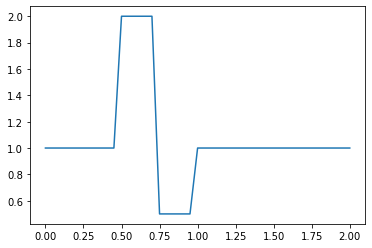

In [16]:
plt.plot(np.linspace(0, 2, nx), u);

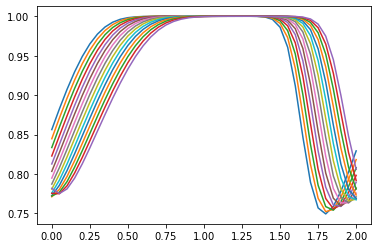

In [20]:
#Next time-step
nextu = np.zeros(nx)

#Run for each time step
for _ in range(steps):
    for i in range(nx):
        #Implement the equation for the next time-step
        nextu[i] = u[i] - (u[i] * dt / dx * (u[i] - u[i-1]))
        
    nextu, u = u, nextu
    plt.plot(np.linspace(0, 2, nx), u)

## Creating a flow animation

In [6]:
#We can represent the whole simulation as a class
class Convection:
    """
    A 1-Dimensional fluid flow (convection) simulator
    
    Inputs:
    u - initial condition of every point (u_n for all i)
    size - maximum x value of the simulation
    self.dt = time step difference
    """
    
    def __init__(self, u, size, dt, c=1):
        
        #Number of points to consider
        self.nx = len(u)
        
        #Size of the simulation
        self.size = size
        
        #Find the distance between individual points
        self.dx = size / (self.nx-1)
        
        #Time-step difference
        self.dt = dt
        
        #Define initial grid
        self.u = u
        
    
    def update(self):
        nextu = np.zeros(self.nx)
        
        for i in range(self.nx): ### SHOULD THIS BE 1, self.nx?? The lesson seems to suggest so.
            #Implement the update equation derived above
            nextu[i] = self.u[i] - self.u[i] * self.dt / self.dx * (self.u[i] - self.u[i-1])
            
        self.u = nextu.copy()
        
    def display(self):
        plt.plot(np.linspace(0, self.size, self.nx), self.u)

In [7]:
u = np.ones(20) #Create grid
u[10:15] = 2
u[15:20] = 0.5


fluid = Convection(u, size=2, dt=0.025, c=1)